In [209]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


In [210]:
(X_train, y_train), (X_test, y_test) =fashion_mnist.load_data()

In [211]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [212]:
X_train[0][4][16]

127

In [213]:
X_train = X_train / 255
X_test = X_test / 255

In [214]:
X_train[0][4][16]

0.4980392156862745

In [215]:
len(X_train)

60000

In [216]:
len(X_train[0]), len(X_train[0][0])

(28, 28)

In [239]:
y_train[13]

5

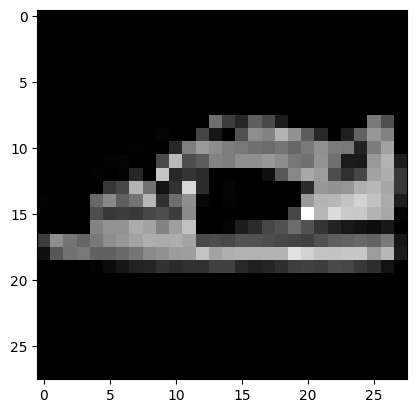

In [240]:
plt.imshow(X_train[13], cmap="gray")
plt.show()

In [219]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [220]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4957 - accuracy: 0.8275


In [221]:
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 2s 4ms/step - loss: 0.4460 - accuracy: 0.8456


0.8456000089645386

In [222]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [223]:
imagenUrl = './depositphotos_101301184-stock-photo-dirty-shoes-with-mud-and.jpg'
imagen = image.load_img(imagenUrl, target_size=(28,28), color_mode='grayscale')
x_imagen = image.img_to_array(imagen)
x_imagen = np.expand_dims(x_imagen, axis=0)

In [241]:
imagen

In [224]:
x_imagen/=255

In [225]:
#x_imagen[0][x_imagen[0]==0.93333334] = 0.1

for i in range(len(x_imagen[0])):
    for j in range(len( x_imagen[0][0])):
        result = x_imagen[0][i][j] - 1
        if result <0:
            x_imagen[0][i][j] -= 1
            x_imagen[0][i][j] *= -1
        else:
            x_imagen[0][i][j] -= 1


In [226]:
model.predict(x_imagen)

1/1 [==============================] - 0s 68ms/step


array([[0.24829121, 0.02814199, 0.22369662, 0.02620519, 0.17150989,
        0.9112014 , 0.17850639, 0.19153821, 0.83221036, 0.00109328]],
      dtype=float32)

In [227]:
prediction = model.predict(x_imagen)

# Obtener el índice de la clase más probable
predicted_class_index = np.argmax(prediction)

# Buscar el nombre de la clase correspondiente
predicted_class_name = class_names[predicted_class_index]

# Imprimir la clase más probable
print("La clase más probable es:", predicted_class_name)

1/1 [==============================] - 0s 63ms/step
La clase más probable es: Sandal


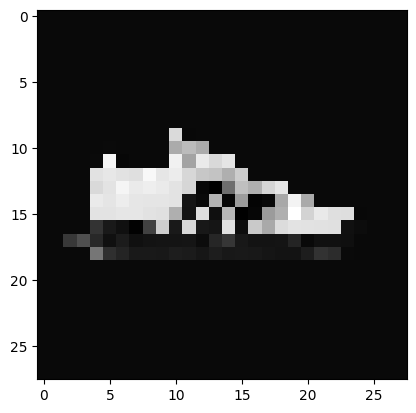

In [228]:
plt.imshow(x_imagen[0], cmap="gray")